Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [34]:
import pandas as pd
import numpy as np
avocado= pd.read_csv('../avocado.csv')

In [11]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [27]:
#avocado['Date'] = pd.to_datetime(avocado['Date'])

In [28]:
#avocado['month'] = avocado['Date'].dt.month
#avocado = avocado.drop(columns='Unnamed: 0',)

In [14]:
#categorizing into several seasons
#def season_of_date(date):
    #year = str(date.year)
    #seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               #'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               #'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    #if date in seasons['spring']:
        #return 'spring'
    #if date in seasons['summer']:
        #return 'summer'
    #if date in seasons['autumn']:
        #return 'autumn'
    #else:
       # return 'winter'

In [15]:
#avocado['season'] = avocado.Date.map(season_of_date)

In [29]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [17]:
avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


In [18]:
avocado.describe(exclude='number')

,Date,type,region,season
count,18249,18249,18249,18249
unique,169,2,54,4
top,2015-05-24 00:00:00,conventional,Indianapolis,winter
freq,108,9126,338,5400
first,2015-01-04 00:00:00,NaN,NaN,NaN
last,2018-03-25 00:00:00,NaN,NaN,NaN


In [35]:
avocado['type'].value_counts(normalize=True)

conventional    0.500082
organic         0.499918
Name: type, dtype: float64

In [20]:
import seaborn as sns
sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'pink')

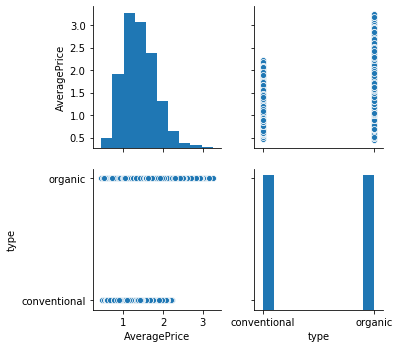

In [54]:
sns.pairplot(avocado, vars=['AveragePrice','type'])

In [36]:
#Split train into test and val
from sklearn.model_selection import train_test_split
train, test = train_test_split(avocado, train_size=0.85, test_size=0.15, 
                              stratify=avocado['type'], random_state=42)
train.shape,test.shape

((15511, 14), (2738, 14))

In [37]:
#Split train into train and val
train,val=train_test_split(train, train_size=0.85, test_size=0.15, 
                              stratify=train['type'], random_state=42)
train.shape,val.shape

((13184, 14), (2327, 14))

In [38]:
#Assigning target/features columns
target='type'
features = train.drop(columns=[target]).columns.tolist()
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test=test[target]

In [39]:
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder



pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(random_state = 42)
)

pipeline.fit(X_train, y_train)

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Val Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.9214199029126213
Val Accuracy 0.9222174473571122


C:\Users\subir\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
# random forest classifier

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42)
)

pipeline.fit(X_train, y_train)

print('Train Accuracy', pipeline.score(X_train, y_train))
print('Val Accuracy', pipeline.score(X_val, y_val))


C:\Users\subir\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy 0.9996207524271845
Val Accuracy 0.994413407821229


In [41]:

transformers = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer()
)

X_train_tranformed = transformers.fit_transform(X_train)
X_val_tranformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_tranformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_tranformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [28]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

Date            0.000172
year            0.000859
Total Bags      0.000859
Unnamed: 0      0.002063
Large Bags      0.002492
Total Volume    0.007907
Small Bags      0.008423
AveragePrice    0.009884
4046            0.014009
region          0.015471
XLarge Bags     0.027417
4225            0.031027
4770            0.047013
dtype: float64

In [29]:
permuter.feature_importances_std_

array([0.00050116, 0.00021053, 0.00206989, 0.00110736, 0.00193334,
       0.00139648, 0.00370273, 0.00038437, 0.00088488, 0.00050116,
       0.00187121, 0.00027179, 0.00060774])

In [30]:
# n_features*n_iters
13*5

65

In [31]:
eli5.show_weights(permuter, 
                  top=None, # How many best feature to diplay. None == all
                  feature_names=feature_names)

Weight,Feature
0.0470 ± 0.0074,4770
0.0310 ± 0.0028,4225
0.0274 ± 0.0037,XLarge Bags
0.0155 ± 0.0012,region
0.0140 ± 0.0039,4046
0.0099 ± 0.0041,AveragePrice
0.0084 ± 0.0018,Small Bags
0.0079 ± 0.0022,Total Volume
0.0025 ± 0.0010,Large Bags
0.0021 ± 0.0010,Unnamed: 0


In [15]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\subir\Anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [11]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Date', 'region'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'Date',
                                          'data_type': dtype('O'),
                                          'mapping': 2017-04-16      1
2017-11-19      2
2017-04-09      3
2015-01-04      4
2015-02-01      5
             ... 
2017-09-24    166
2015-04-12    167
2015-10-04    168
2017-11-26    169
NaN            -2
Length: 170, dtype: int64},
                                         {'co...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, mis

In [12]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_val)
print(f'Val accuracy: {accuracy_score(y_val, y_pred)}')

Val accuracy: 0.9926944563816072


In [14]:
encoder = ce.ordinal.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000, # upper threshold
    max_depth=7,
    learning_rate=0.5, 
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          eval_metric='auc',
          early_stopping_rounds=50) # stop if the score hasn't improved for 50 rounds/iterations

[0]	validation_0-auc:0.99681	validation_1-auc:0.99332
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.99826	validation_1-auc:0.995601
[2]	validation_0-auc:0.998995	validation_1-auc:0.996601
[3]	validation_0-auc:0.999678	validation_1-auc:0.997924
[4]	validation_0-auc:0.99981	validation_1-auc:0.997962
[5]	validation_0-auc:0.999883	validation_1-auc:0.999027
[6]	validation_0-auc:0.999945	validation_1-auc:0.999121
[7]	validation_0-auc:0.999962	validation_1-auc:0.999377
[8]	validation_0-auc:0.99997	validation_1-auc:0.99946
[9]	validation_0-auc:0.999986	validation_1-auc:0.999484
[10]	validation_0-auc:0.999993	validation_1-auc:0.999522
[11]	validation_0-auc:0.999996	validation_1-auc:0.999645
[12]	validation_0-auc:0.999999	validation_1-auc:0.99966
[13]	validation_0-auc:0.999999	validation_1-auc:0.999737
[14]	validation_0-auc:1	validation_1-auc:0.999761
[15]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

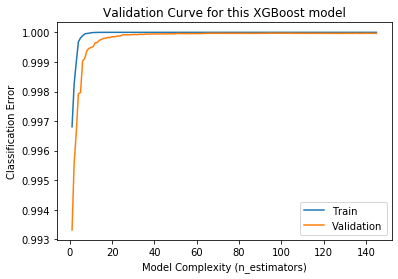

In [22]:
import matplotlib.pyplot as plt
results = model.evals_result()
train_error = results['validation_0']['auc']
val_error = results['validation_1']['auc']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
#plt.ylim((0.5, 0.10)) # Zoom in
plt.legend();